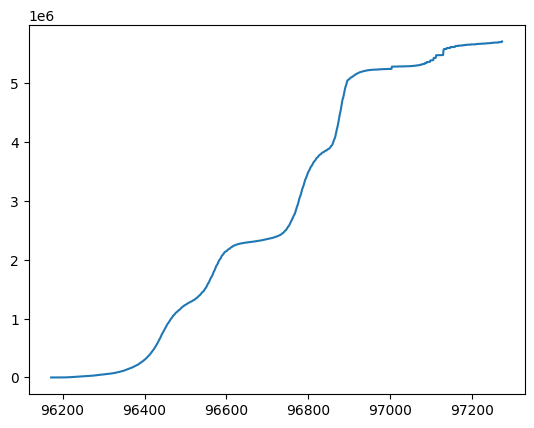

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df1 = pd.read_csv("1.csv")

ukraine_data = df1[df1['key_apple_mobility'] == 'Ukraine']
data = ukraine_data[ukraine_data['confirmed'] != '']
plt.plot(data.index, data['confirmed'])
data = data[['date', 'confirmed']]

In [19]:
import datetime 

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

data['date'] = data['date'].apply(str_to_datetime)

In [20]:
data.index = data.pop('date')
data

,confirmed
date,
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
2020-01-06,NaN
2020-01-07,NaN
...,...
2023-03-05,5701743.0
2023-03-06,5701855.0
2023-03-07,5701959.0


In [21]:
data['confirmed'] = data['confirmed'].fillna(method='bfill')
data[data.index >= '2020-03-03']

,confirmed
date,
2020-03-03,1.0
2020-03-04,1.0
2020-03-05,1.0
2020-03-06,1.0
2020-03-07,1.0
...,...
2023-03-05,5701743.0
2023-03-06,5701855.0
2023-03-07,5701959.0


In [22]:
import warnings
warnings.filterwarnings('ignore')

Stationaruty check

In [23]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

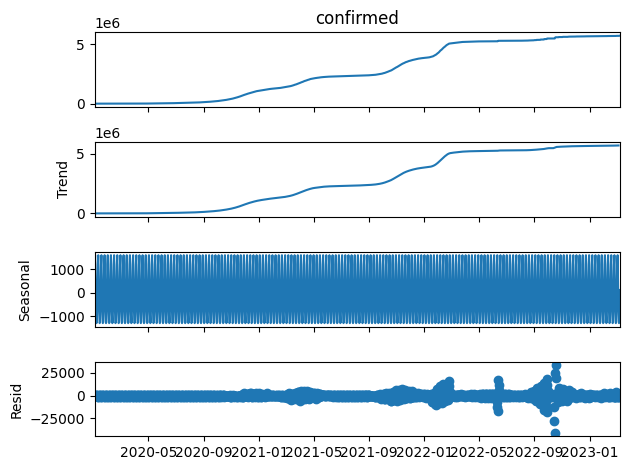

In [24]:
decomposition = sm.tsa.seasonal_decompose(data['confirmed'],model='additive')
fig = decomposition.plot()
plt.show()

In [25]:
adtest = adfuller(data)
adtest[1]

0.9111034068276582

Split of data

In [26]:
q_80 = int(len(data) * .8)
dates_train, X_train = data.index[:q_80], data['confirmed'][:q_80]
dates_test, X_test = data.index[q_80:], data['confirmed'][q_80:]


In [27]:
scaler = MinMaxScaler()
scaler.fit(X_train.to_numpy().reshape(-1, 1))  

X_train_scaled = scaler.transform(X_train.to_numpy().reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.to_numpy().reshape(-1, 1))

Arima :
- AR:  p
- I : d
- MA: q

In [28]:
steps = auto_arima(X_train_scaled, trace=True, suppress_warnings=True)
best_order = steps.get_params()['order']
steps.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-10851.983, Time=0.87 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-11341.810, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-11341.472, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-11341.937, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-11337.811, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-11425.518, Time=0.43 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-10825.510, Time=0.86 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-11406.690, Time=0.76 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-11325.521, Time=0.63 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-11432.012, Time=1.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-11339.937, Time=0.33 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-10823.280, Time=0.87 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-11404.730, Time=0.59 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-11335.781, Time=0.36 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  929
Model:               SARIMAX(0, 2, 2)   Log Likelihood                5720.006
Date:                Mon, 22 Apr 2024   AIC                         -11432.012
Time:                        00:06:24   BIC                         -11412.684
Sample:                             0   HQIC                        -11424.639
                                - 929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -4.42e-06    8.3e-06     -0.532      0.594   -2.07e-05    1.19e-05
ma.L1         -0.2541      0.007    -34.750      0.000      -0.268      -0.240
ma.L2         -0.3018      0.017    -18.131      0.000      -0.334      -0.269
sigma2      2.498e-07   2.33e-09    107.405      0.000    2.45e-07    2.54e-07
===================================================================================
Ljung-Box (L1) (Q):                   4.09   Jarque-Bera (JB):            154223.60
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):             168.64   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model = ARIMA(X_train_scaled, order=(0,2,5)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  929
Model:                 ARIMA(0, 2, 5)   Log Likelihood                5723.623
Date:                Mon, 22 Apr 2024   AIC                         -11435.245
Time:                        00:06:25   BIC                         -11406.253
Sample:                             0   HQIC                        -11424.186
                                - 929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4400      0.008    -54.832      0.000      -0.456      -0.424
ma.L2         -0.1486      0.024     -6.304      0.000      -0.195      -0.102
ma.L3         -0.0532      0.030     -1.764      0.078      -0.112       0.006
ma.L4          0.0004      0.028      0.014      0.989      -0.055       0.056
ma.L5          0.0714      0.021      3.370      0.001       0.030       0.113
sigma2      2.535e-07   2.29e-09    110.541      0.000    2.49e-07    2.58e-07
===================================================================================
Ljung-Box (L1) (Q):                  42.63   Jarque-Bera (JB):            116597.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             168.73   Skew:                             1.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        57.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
pred = model.forecast(steps=len(X_test_scaled))

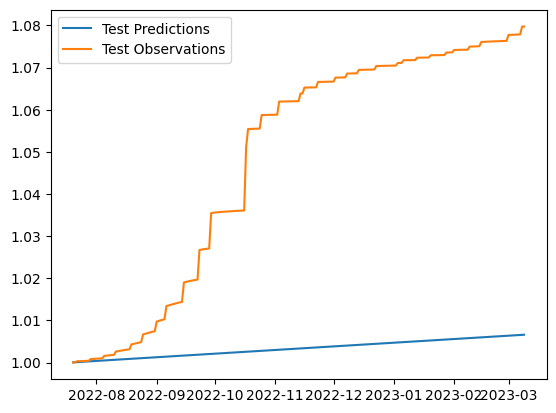

: 

In [31]:
plt.plot(dates_test, pred, label='Test Predictions')
plt.plot(dates_test, X_test_scaled, label='Test Observations')

plt.legend()
plt.show()